# Hypothesis testing

_Author: Christoph Rahmede_

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Statistical-Hypotheses" data-toc-modified-id="Statistical-Hypotheses-1">Statistical Hypotheses</a></span></li><li><span><a href="#Significance-level" data-toc-modified-id="Significance-level-2">Significance level</a></span></li><li><span><a href="#P-values" data-toc-modified-id="P-values-3">P-values</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-4">Example</a></span></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-5">Get the data</a></span></li><li><span><a href="#One-sample-t-test" data-toc-modified-id="One-sample-t-test-6">One-sample t-test</a></span></li><li><span><a href="#Two-sample-t-test" data-toc-modified-id="Two-sample-t-test-7">Two-sample t-test</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Groupwise-means-and-standard-deviations" data-toc-modified-id="Groupwise-means-and-standard-deviations-7.0.1">Groupwise means and standard deviations</a></span></li><li><span><a href="#T-test-for-differences" data-toc-modified-id="T-test-for-differences-7.0.2">T-test for differences</a></span></li></ul></li></ul></li><li><span><a href="#Power" data-toc-modified-id="Power-8">Power</a></span></li><li><span><a href="#Compare-the-differences-across-different-variables" data-toc-modified-id="Compare-the-differences-across-different-variables-9">Compare the differences across different variables</a></span></li></ul></div>

## Statistical Hypotheses

To come to decisions based on sample evidence it is useful to formulate hypotheses about the data. For example we could assume that the mean of a variable should have a certain size, or that the means of a variable across different groups are the same. 

Looking at data samples we will be able to determine if there is enough support for our original hypothesis (the so-called null hypothesis $H_0$). If there is we will accept it, otherwise we may reject it and accept the alternative hypothesis $H_1$. Whether we accept or reject the null hypothesis will depend on a predefined significance level that we have to reach before rejecting it.

If we come to reject the null hypothesis that still does not necessarily mean that it was wrong, neither can we safely assume that it was correct if we come to accept the null hypothesis. If we are not taking the correct decisions we may commit one of two errors:

- Type I error: We reject the null hypothesis even though it is true.
- Type II error: We accept the null hypothesis even though it is false.

We would like to avoid both of these errors. That is often not possible. Then we face similar problems as with false positives and false negatives which might have different costs. We can adjust the decision process taking into account that doing so might bring for example the type I error down, but at the cost of a higher type II error.
Increasing the sample size might help to reduce both types of errors.

## Significance level

The significance level of a test is the maximum probability of making a type I error which we would be willing to accept. In practice this level might be chosen as 0.1, 0.05 or 0.01.

## P-values

In an hypothesis test we ask if the sample statistic has a more extreme value than a critical threshold. If instead we ask for the probability of obtaining a sample statistic at least as extreme as the one found we obtain the p-value. High (absolute) values of the statistic and correspondingly small p-values lead to the rejection of the null hypothesis in favor of the alternative hypothesis.

## Example

We draw a sample of size $n$ from some population which we assume to be normally distributed with hypothesized mean $\mu$ and given standard deviation $\sigma$. We determine the mean of the sample and expect to find it with 95 % chance in the range 

$$
\mu\pm1.96\frac{\sigma}{\sqrt{n}}
$$

There is only a 5 % chance of finding the sample mean outside this range. If the found the mean is within the range, our null hypothesis is accepted, otherwise it is rejected (we would say at an 0.05 level of significance).

This kind of test is called a two-tailed or two-sided test. In this case we are testing for equality. For unequalities (larger or smaller), we would use a one-sided test.

## Get the data

In [1]:
import warnings
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(
    '../../../dataset-collection/auto-mpg/auto-mpg.csv', sep='\s+', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'year', 'origin', 'name']
df.drop(df[df.horsepower == '?'].index, inplace=True)
df['horsepower'] = df.horsepower.astype(float)
df['brand'] = df.name.map(lambda x: x.split(' ')[0]
                          ).replace(
    {'toyouta': 'toyota',
     'maxda': 'mazda',
     'chevroelt': 'chevrolet',
     'vw': 'volkswagen',
     'vokswagen': 'volkswagen',
     'mercedes-benz': 'mercedes'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
brand           392 non-null object
dtypes: float64(5), int64(3), object(2)
memory usage: 33.7+ KB


## One-sample t-test

We test if the sample mean equals some hypothetical population mean. For large enough sample size we can use the test statistic

$$
Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}
$$

In our data we have the following mean:

In [3]:
df.mpg.mean()

23.44591836734694

We can calculate the test statistic for a hypothesized value:

In [4]:
mean_assumption = 23
tstat_1 = (df.mpg.mean()-mean_assumption)/df.mpg.sem()
tstat_1

1.1311626868489042

We can do the calculation also with `scipy.stats`:

In [5]:
ttest = stats.ttest_1samp(df.mpg, mean_assumption)
ttest

Ttest_1sampResult(statistic=1.131162686848895, pvalue=0.25867993970359504)

We can access the parts of the result:

In [6]:
print(ttest.statistic)
print(ttest.pvalue)

1.131162686848895
0.25867993970359504


## Two-sample t-test

Two random samples with sizes $n_1$, $n_2$ are drawn from normally distributed populations with equal standard deviations $\sigma$.
The samples have means $\bar{X}_1$, $\bar{X}_2$ and standard deviations $\sigma_1$, $\sigma_2$.

The estimate of the population standard deviation based on the pooled sample standard deviations is 

$$
\sigma = \sqrt{\frac{(n_1-1) S_1^2+(n_2-1)S_2^2}{n_1+n_2-2}}
$$

The test statistic is the t-distributed variable

$$
T = \frac{\bar{X}_1-\bar{X}_2}{\sigma\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}
$$

This statistic will define a critical value which translates into a p-value.

#### Groupwise means and standard deviations

In [7]:
df.groupby('origin')['mpg'].agg([np.mean, np.std])

,mean,std
origin,,
1,20.033469,6.440384
2,27.602941,6.580182
3,30.450633,6.090048


#### T-test for differences

In [8]:
x_1 = df.mpg[df.origin == 1]
x_2 = df.mpg[df.origin == 2]
sigma_pooled = np.sqrt(((len(x_1)-1)*x_1.var(ddof=1) +
                        (len(x_2)-1)*x_2.var(ddof=1))/(len(x_1)+len(x_2)-2))
tstat_2 = (x_1.mean()-x_2.mean())/(sigma_pooled*np.sqrt(1/len(x_1)+1/len(x_2)))
tstat_2

-8.534455914399231

Scipy implementation:

In [9]:
stats.ttest_ind(df.mpg[df.origin == 1], df.mpg[df.origin == 2])

Ttest_indResult(statistic=-8.534455914399228, pvalue=6.306531719750568e-16)

The same result can be inferred from the already measured values:

In [10]:
stats.ttest_ind_from_stats(
    df.mpg[df.origin == 1].mean(), df.mpg[df.origin == 1].std(
        ddof=1), len(df.mpg[df.origin == 1]),
    df.mpg[df.origin == 2].mean(), df.mpg[df.origin == 2].std(ddof=1), len(df.mpg[df.origin == 2]))

Ttest_indResult(statistic=-8.534455914399231, pvalue=6.306531719750342e-16)

Let's look at the three groups:

In [11]:
from itertools import combinations

In [12]:
list(combinations(df.origin.unique(), 2))

[(1, 3), (1, 2), (3, 2)]

In [13]:
for comb in combinations(df.origin.unique(), 2):
    t_test_result = stats.ttest_ind(
        df.mpg[df.origin == comb[0]], df.mpg[df.origin == comb[1]])
    print(comb, t_test_result.statistic, t_test_result.pvalue)

(1, 3) -12.664889006229084 4.17283714676552e-30
(1, 2) -8.534455914399228 6.306531719750568e-16
(3, 2) 2.723324735392516 0.007256875026960007


We can do the same with statsmodels as well:

In [14]:
import statsmodels.api as sm

In [15]:
sm.stats.ttest_ind(df.mpg[df.origin == 1], df.mpg[df.origin == 2])

(-8.534455914399228, 6.306531719750568e-16, 311.0)

## Power

Above we called a Type II error if we accept the null hypothesis even though it is false. The power is the opposite, i.e. the probability of rejecting the null hypothesis when the alternative hypothesis is true. We can phrase this as the capability of finding an effect if there is one.

     Power = 1 - P(Type II Error) 


Basically we have to ask for any alternative hypothesis how high is the probability that it leads to a value more extreme than the critical value determined through the hypothesis test. In the case of high power, we will have a low probability of committing a Type II Error and vice versa. Goals for achieving a certain amount of power are often set around 0.8.

The usefulness of the power is that we do not need much to calculate it. It relates four different quantities to each other: 

- the effect size (e.g. our t-statistic from above)
- the sample size
- the required significance level
- the power

Knowing any three of these will determine the fourth. In this way we can ask questions like 

- Given that we have a certain sample size, an effect of a certain observed size and a fixed significance level, how large a sample size will we require?
- Given that we have a fixed significance level and power and we know how much data we can obtain, how large an effect do we need to observe to fulfill our goals?



In the following cell, we generate data for two groups with differing means, but same standard deviations and sample sizes. Below you can see how overlapping the data is.

- Play around with the parameters `loc`, `scale` and `size` for each of the groups. How does that impact the result of the t-test?

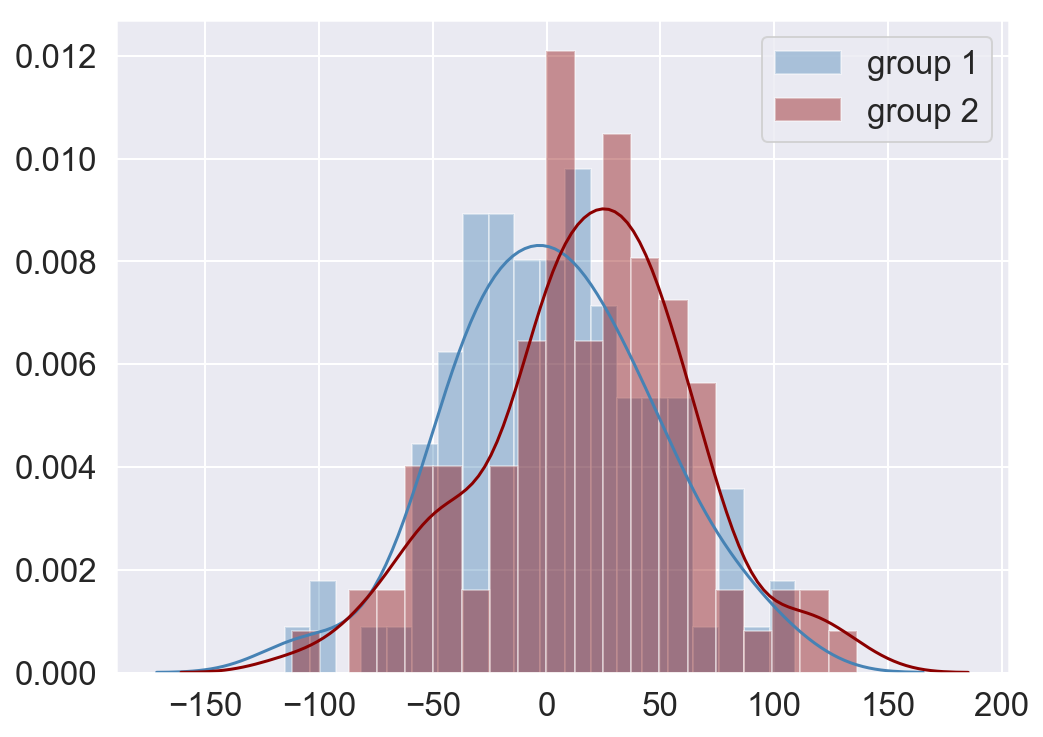

-2.2620139704259454 0.024782819014640273


In [16]:
np.random.seed(1)
data_1 = np.random.normal(loc=0, scale=50, size=100)
data_2 = np.random.normal(loc=10, scale=50, size=100)

fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(data_1, bins=20, color='steelblue',
             ax=ax, kde=True, label='group 1')
sns.distplot(data_2, bins=20, color='darkred',
             ax=ax, kde=True, label='group 2')
ax.legend()
plt.show()

tstat_data = stats.ttest_ind(data_1, data_2)
print(tstat_data.statistic, tstat_data.pvalue)

You will have noticed how the effect size reacts to varying means, standard deviations and sample sizes. Making the effect detectable (we know it is there because we set it up) is related to creating enough power.

We can calculate the power with statsmodels. First we instantiate the object `sm.stats.TTestIndPower()` which is appropriate for two independent samples. Then we use the `solve_power` function to determine any of the four quantities above given the other three. The argument `ratio` indicates the proportions of sample sizes.

In [17]:
power = sm.stats.TTestIndPower()

In [18]:
power.solve_power(effect_size=tstat_data.statistic,
                  power=0.8,
                  alpha=0.01,
                  ratio=1)

6.415814008315673

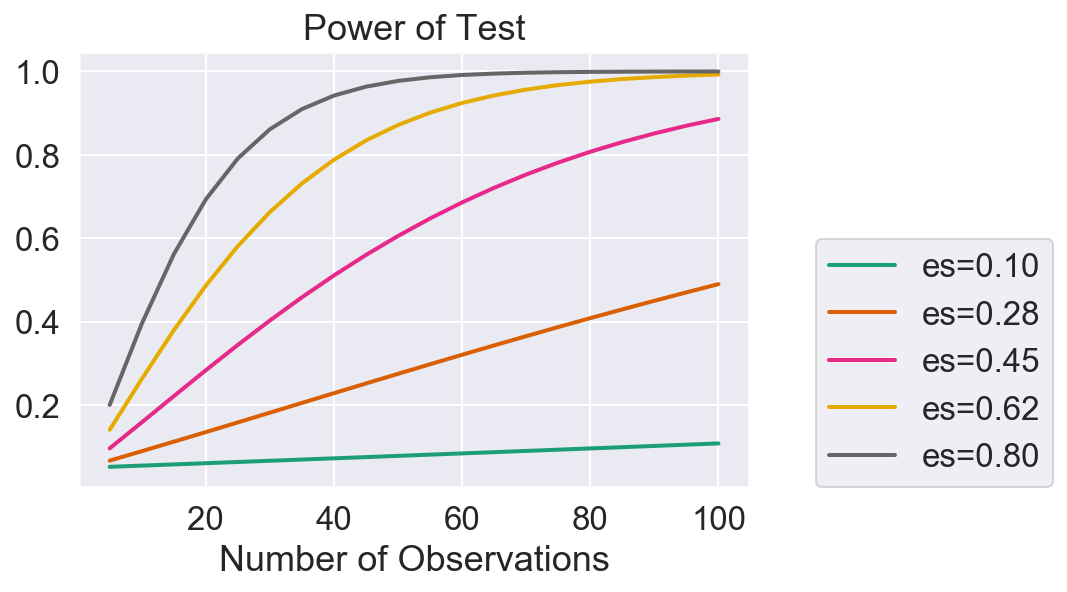

In [19]:
fig, ax = plt.subplots()
power.plot_power(dep_var='nobs',
                 nobs=np.linspace(5, 100, 20),
                 effect_size=np.linspace(0.1, 0.8, 5),
                 ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

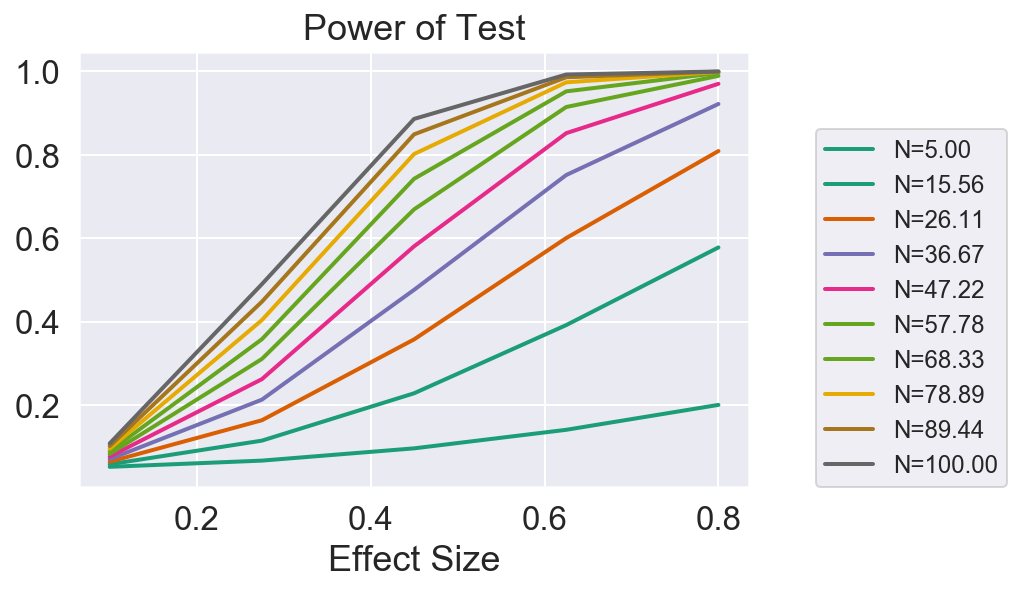

In [20]:
fig, ax = plt.subplots()
power.plot_power(dep_var='effect_size',
                 nobs=np.linspace(5, 100, 10),
                 effect_size=np.linspace(0.1, 0.8, 5),
                 ax=ax)
ax.legend(loc=[1.1, 0], fontsize=12)
plt.show()

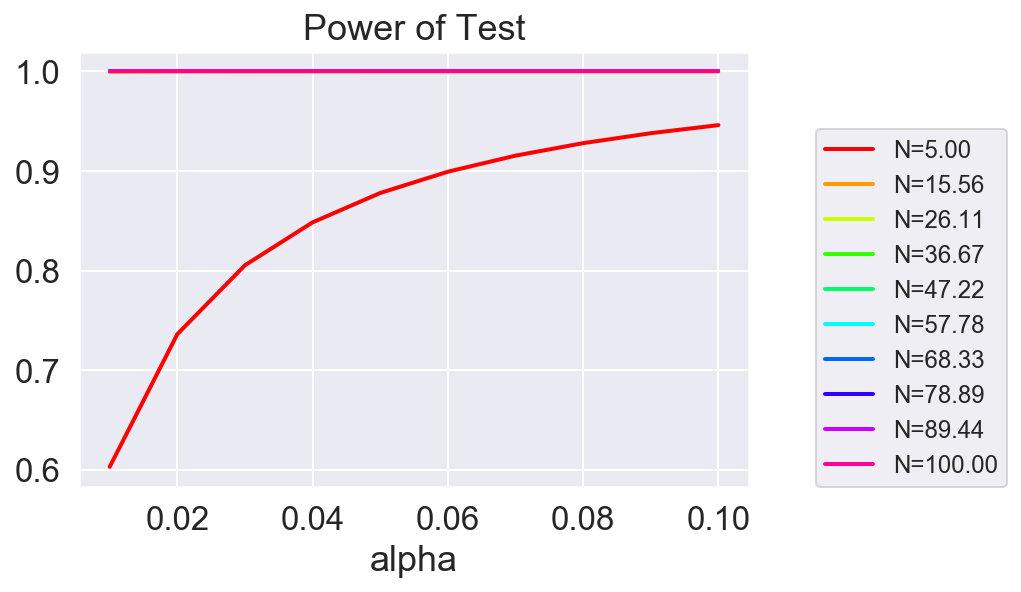

In [21]:
fig, ax = plt.subplots()
power.plot_power(dep_var='alpha',
                 nobs=np.linspace(5, 100, 10),
                 alpha=np.linspace(0.01, 0.1, 10),
                 effect_size=-tstat_data.statistic,
                 ax=ax)
ax.legend(loc=[1.1, 0], fontsize=12)
plt.show()

Now we use the appropriate object for a one-sample t-test.

In [22]:
power = sm.stats.TTestPower()
power.power(0.8, 10, 0.05)

0.6162327563473081

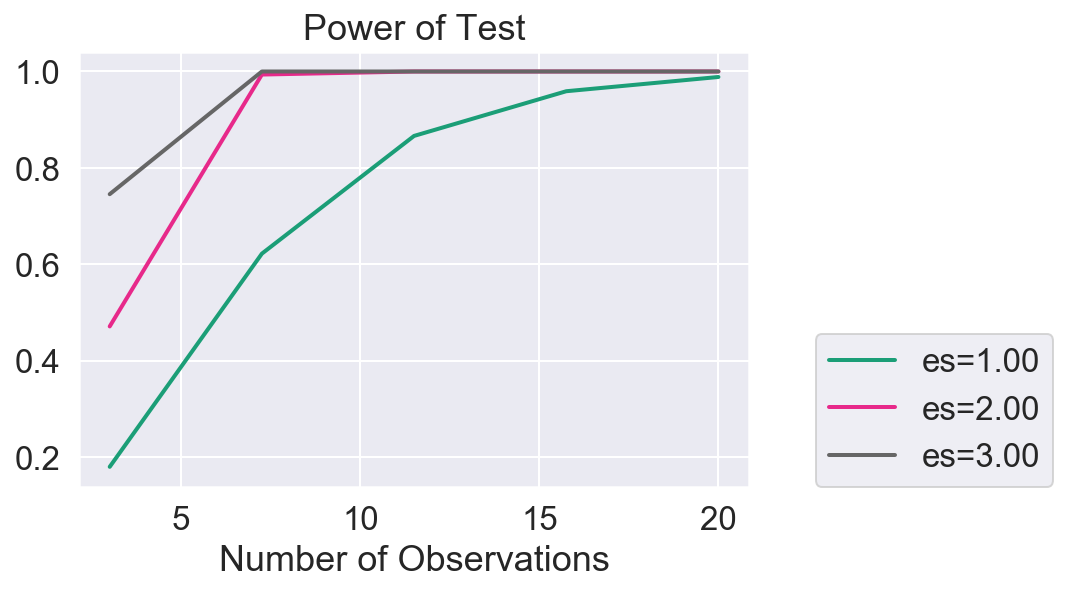

In [23]:
fig, ax = plt.subplots()
power.plot_power(dep_var='nobs',
                 nobs=np.linspace(3, 20, 5),
                 effect_size=np.array([1, 2, 3]),
                 alpha=0.05,
                 ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

## Compare the differences across different variables